In [2]:
import scipy

In [3]:
import numpy
import pandas
import sklearn
import matplotlib

In [15]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection


In [16]:
from sklearn.metrics import classification_report


In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [24]:
import os
os.chdir(r'C:\Users\rashid\Desktop')

In [33]:
names = ['sepal-length', 'sepal-width', 'petal-legth', 'petal-width', 'class']

In [34]:
dataset = pandas.read_csv('Iris.csv', names=names)

In [35]:
print(dataset.shape)

(150, 5)


In [36]:
print(dataset.head(20))

    sepal-length  sepal-width  petal-legth  petal-width        class
0            5.1          3.5          1.4          0.2  Iris-setosa
1            4.9          3.0          1.4          0.2  Iris-setosa
2            4.7          3.2          1.3          0.2  Iris-setosa
3            4.6          3.1          1.5          0.2  Iris-setosa
4            5.0          3.6          1.4          0.2  Iris-setosa
5            5.4          3.9          1.7          0.4  Iris-setosa
6            4.6          3.4          1.4          0.3  Iris-setosa
7            5.0          3.4          1.5          0.2  Iris-setosa
8            4.4          2.9          1.4          0.2  Iris-setosa
9            4.9          3.1          1.5          0.1  Iris-setosa
10           5.4          3.7          1.5          0.2  Iris-setosa
11           4.8          3.4          1.6          0.2  Iris-setosa
12           4.8          3.0          1.4          0.1  Iris-setosa
13           4.3          3.0     

In [39]:
print(dataset.describe())

       sepal-length  sepal-width  petal-legth  petal-width
count    150.000000   150.000000   150.000000   150.000000
mean       5.843333     3.054000     3.758667     1.198667
std        0.828066     0.433594     1.764420     0.763161
min        4.300000     2.000000     1.000000     0.100000
25%        5.100000     2.800000     1.600000     0.300000
50%        5.800000     3.000000     4.350000     1.300000
75%        6.400000     3.300000     5.100000     1.800000
max        7.900000     4.400000     6.900000     2.500000


In [40]:
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


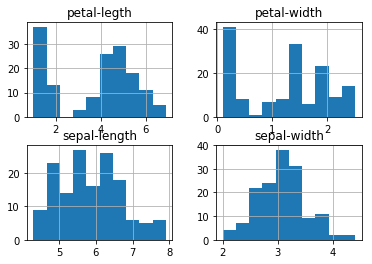

In [43]:
dataset.hist()
plt.show()

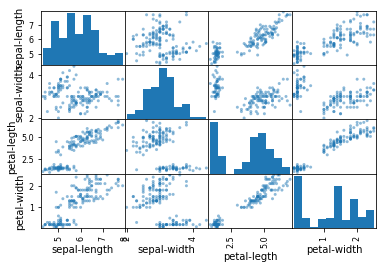

In [45]:
scatter_matrix(dataset)
plt.show()

In [48]:
array= dataset.values

In [49]:
X=array[:, 0:4]

In [52]:
Y=array[:, 4]

In [53]:
validation_size = 0.20

In [66]:
X_train, X_validation, Y_train, Y_validation =model_selection.train_test_split(X, Y, test_size=validation_size, random_state =seed)

In [67]:
scoring = 'accuracy'

In [68]:
models =[]

In [69]:
models.append(('LR',LogisticRegression()))

In [70]:
models.append(('KNN', KNeighborsClassifier()))

In [71]:
models.append(('SVM', SVC()))

In [72]:
print(models)

[('LR', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('KNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')), ('SVM', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]


In [73]:
results=[]

In [74]:
names=[]

In [75]:
for name,model in models:
    kfold=model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    
    results.append(cv_results)
    names.append(name)
    
    msg = "%s: %f (%f)" %(name, cv_results.mean(), cv_results.std())
    
    print(msg)

LR: 0.966667 (0.040825)
KNN: 0.983333 (0.033333)
SVM: 0.991667 (0.025000)


In [77]:
for name,model in models:
    model.fit(X_train, Y_train)
    predictions = model.predict(X_validation)
    print(name)
    

LR
KNN
SVM


In [78]:
print(accuracy_score(Y_validation, predictions))

0.9333333333333333


In [79]:
print(classification_report(Y_validation,predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.85      1.00      0.92        11

    avg / total       0.94      0.93      0.93        30

